In [ ]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import requests
import getpass

url = getpass.getpass("Enter the URL of the document to download: ")

doc = requests.get(url)

with open("doc.pdf", "wb") as f:
    f.write(doc.content)

In [151]:
# %pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph
# %pip install -qU langchain-google-genai

In [ ]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

In [ ]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [ ]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain_google_genai import ChatGoogleGenerativeAI

llm2 = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [ ]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain_google_genai import ChatGoogleGenerativeAI

llm3 = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [155]:
# %pip install -qU langchain-ollama
# %pip install -U ollama

In [156]:
# from langchain_ollama import ChatOllama

# llm = ChatOllama(
#     model="qwen3:4b",
#     temperature=0,
#     # other params...
# )

In [157]:
# %pip install -qU langchain-pinecone
# %pip install -qU pinecone

In [158]:
# %pip install -qU langchain-huggingface
# %pip install sentence-transformers

In [159]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

In [160]:
# from langchain_ollama import OllamaEmbeddings

# embeddings = OllamaEmbeddings(model="nomic-embed-text")

In [161]:
print(embeddings)

model_name='sentence-transformers/all-mpnet-base-v2' cache_folder=None model_kwargs={} encode_kwargs={} query_encode_kwargs={} multi_process=False show_progress=False


In [ ]:
from langchain_pinecone import PineconeVectorStore
from pinecone import Pinecone
import getpass
import os

if not os.environ.get("PINECONE_API_KEY"):
  os.environ["PINECONE_API_KEY"] = getpass.getpass("Enter API key for Pinecone: ")

pc = Pinecone(os.environ["PINECONE_API_KEY"])
index = pc.Index("useless")

vector_store = PineconeVectorStore(embedding=embeddings, index=index)

print(index.describe_index_stats())
print(vector_store)

{'dimension': 768,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {},
 'total_vector_count': 0,
 'vector_type': 'dense'}


In [163]:
# %pip install -qU langchain-community pymupdf

In [164]:
from langchain_community.document_loaders import PyMuPDFLoader

file_path = "./doc.pdf"
loader = PyMuPDFLoader(file_path)

docs = loader.load()
docs[0].page_content

'National Insurance Co. Ltd. \nPremises No. 18-0374, Plot no. CBD-81,  \nNew Town, Kolkata - 700156 \nPage 1 of 25 \nNational Parivar Mediclaim Plus Policy \nUIN: NICHLIP25039V032425 \n \nNational Insurance Company Limited \n \n \n \n \n \nCIN - U10200WB1906GOI001713 \nIRDAI Regn. No. – 58 \n \n           Issuing Office \nNational Parivar Mediclaim Plus Policy  \n \nWhereas the Proposer designated in the schedule hereto has by a Proposal together with Declaration, which shall be the basis of \nthis contract and is deemed to be incorporated herein, has applied to National Insurance Company Ltd. (hereinafter called the \nCompany), for the insurance hereinafter set forth, in respect of person(s)/ family members named in the schedule hereto \n(hereinafter called the Insured Persons) and has paid the premium as consideration for such insurance. \n \n1 PREAMBLE \nThe Company undertakes that if during the Policy Period, any Insured Person shall suffer any illness or disease (hereinafter calle

In [165]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(docs)

print(f"Split blog post into {len(all_splits)} sub-documents.")

Split blog post into 144 sub-documents.


In [166]:
document_ids = vector_store.add_documents(documents=all_splits)

print(document_ids[:3])

['bbcd1475-892b-495c-b415-5772cf843c87', '72788e01-2d0c-479c-9972-f4ecc183bed9', '70f12d6f-d21a-401e-ad49-10d320f86162']


In [167]:
from langchain_core.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""
prompt = PromptTemplate.from_template(template)

In [208]:
total_documents = len(all_splits)
third = total_documents // 3

for i, document in enumerate(all_splits):
    if i < third:
        document.metadata["section"] = "beginning"
    elif i < 2 * third:
        document.metadata["section"] = "middle"
    else:
        document.metadata["section"] = "end"


all_splits[0].metadata

{'producer': 'Microsoft® Word LTSC',
 'creator': 'Microsoft® Word LTSC',
 'creationdate': '2025-02-11T11:39:19+05:30',
 'source': './doc.pdf',
 'file_path': './doc.pdf',
 'total_pages': 25,
 'format': 'PDF 1.7',
 'title': 'National Parivar Mediclaim Plus Policy (NPMPP)',
 'author': 'Avishek Banerjee',
 'subject': '',
 'keywords': '',
 'moddate': '2025-02-11T11:39:19+05:30',
 'trapped': '',
 'modDate': "D:20250211113919+05'30'",
 'creationDate': "D:20250211113919+05'30'",
 'page': 0,
 'start_index': 0,
 'text': 'National Insurance Co. Ltd. \nPremises No. 18-0374, Plot no. CBD-81,  \nNew Town, Kolkata - 700156 \nPage 1 of 25 \nNational Parivar Mediclaim Plus Policy \nUIN: NICHLIP25039V032425 \n \nNational Insurance Company Limited \n \n \n \n \n \nCIN - U10200WB1906GOI001713 \nIRDAI Regn. No. – 58 \n \n           Issuing Office \nNational Parivar Mediclaim Plus Policy  \n \nWhereas the Proposer designated in the schedule hereto has by a Proposal together with Declaration, which shall be 

In [ ]:
_ = vector_store.add_documents(all_splits)

In [210]:
from typing import Literal
from langchain_core.documents import Document
from typing_extensions import List, TypedDict
from typing_extensions import Annotated

class Search(TypedDict):
    """Search query."""

    query: Annotated[str, ..., "Search query to run."]
    section: Annotated[
        Literal["beginning", "middle", "end"],
        ...,
        "Section to query.",
    ]

In [211]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict

class State(TypedDict):
    question: str
    id: int
    query: Search
    context: List[Document]
    final_context: List[Document]
    answer: str

In [ ]:
def analyze_query(state: State):
    if(state["id"] % 3 == 0):
        structured_llm = llm.with_structured_output(Search)
        query = structured_llm.invoke(state["question"])
        return {"query": query}
    elif(state["id"] % 3 == 1):
        structured_llm2 = llm2.with_structured_output(Search)
        query = structured_llm2.invoke(state["question"])
        return {"query": query}
    else:
        structured_llm3 = llm3.with_structured_output(Search)
        query = structured_llm3.invoke(state["question"])
        return {"query": query}

def retrieve(state: State):
    query = state["query"]
    pinecone_filter = {"section": query["section"]}
    retrieved_docs = vector_store.similarity_search(
        query["query"],
        filter=pinecone_filter,
    )
    return {"context": retrieved_docs}

def generate(state: State):
    docs_content = "\n\n".join(item["document"]["chunk_text"] for item in state["final_context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    if(state["id"] % 3 == 0):
        response = llm.invoke(messages)
    elif(state["id"] % 3 == 1):
        response = llm2.invoke(messages)
    else:
        response = llm3.invoke(messages)
    return {"answer": response.content}

In [ ]:
## reranking
from pinecone import Pinecone

if not os.environ.get("PINECONE_API_KEY"):
  os.environ["PINECONE_API_KEY"] = getpass.getpass("Enter API key for Pinecone: ")

pc = Pinecone(os.environ["PINECONE_API_KEY"])

# ranked_results = index.search(
#     namespace="__default__", 
#     query={
#         "inputs": {"text": "Disease prevention"}, 
#         "top_k": 4
#     },
#     rerank={
#         "model": "bge-reranker-v2-m3",
#         "top_n": 2,
#         "rank_fields": ["chunk_text"]
#     },
#     fields=["category", "chunk_text"]
# )

def reranker(state : State):

    documents = []
    for doc in state["context"]:
        documents.append({"id": doc.id, "chunk_text": doc.page_content})

    ranked_results = pc.inference.rerank(
        model="bge-reranker-v2-m3",
        query=state["question"],
        documents=documents,
        top_n=2,
        rank_fields=["chunk_text"],
        return_documents=True,
        parameters={
            "truncate": "END"
        }
    )

    # print(ranked_results)

    return {"final_context" : ranked_results.data}

In [225]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([analyze_query, retrieve, reranker, generate])
graph_builder.add_edge(START, "analyze_query")
graph = graph_builder.compile()

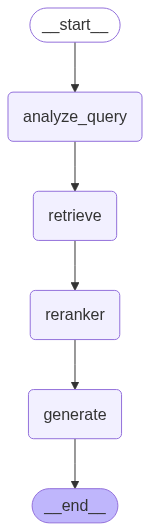

In [226]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [227]:
# from langgraph.graph import MessagesState, StateGraph

# graph_builder = StateGraph(MessagesState)

# print(MessagesState.keys)

In [228]:
# from langchain_core.tools import tool

# @tool(response_format="content_and_artifact")
# def retrieve(query: str):
#     """Retrieve information related to a query."""
#     retrieved_docs = vector_store.similarity_search(query, k=2)
#     serialized = "\n\n".join(
#         (f"Source: {doc.metadata}\nContent: {doc.page_content}")
#         for doc in retrieved_docs
#     )
#     return serialized, retrieved_docs

In [229]:
# from langchain_core.messages import SystemMessage
# from langgraph.prebuilt import ToolNode


# # Step 1: Generate an AIMessage that may include a tool-call to be sent.
# def query_or_respond(state: MessagesState):
#     """Generate tool call for retrieval or respond."""
#     llm_with_tools = llm.bind_tools([retrieve])
#     response = llm_with_tools.invoke(state["question"])
#     # MessagesState appends messages to state instead of overwriting
#     return {"query": [response]}


# # Step 2: Execute the retrieval.
# tools = ToolNode([retrieve])


# # Step 3: Generate a response using the retrieved content.
# def generate(state: MessagesState):
#     """Generate answer."""
#     # Get generated ToolMessages
#     recent_tool_messages = []
#     for message in reversed(state["messages"]):
#         if message.type == "tool":
#             recent_tool_messages.append(message)
#         else:
#             break
#     tool_messages = recent_tool_messages[::-1]

#     # Format into prompt
#     docs_content = "\n\n".join(doc.content for doc in tool_messages)
#     system_message_content = (
#         "You are an assistant for question-answering tasks. "
#         "Use the following pieces of retrieved context to answer "
#         "the question. If you don't know the answer, say that you "
#         "don't know. Use three sentences maximum and keep the "
#         "answer concise."
#         "\n\n"
#         f"{docs_content}"
#     )
#     conversation_messages = [
#         message
#         for message in state["messages"]
#         if message.type in ("human", "system")
#         or (message.type == "ai" and not message.tool_calls)
#     ]
#     prompt = [SystemMessage(system_message_content)] + conversation_messages

#     # Run
#     response = llm.invoke(prompt)
#     return {"answer": [response]}

In [230]:
# from langgraph.graph import END
# from langgraph.prebuilt import ToolNode, tools_condition

# graph_builder.add_node(query_or_respond)
# graph_builder.add_node(tools)
# graph_builder.add_node(generate)

# graph_builder.set_entry_point("query_or_respond")
# graph_builder.add_conditional_edges(
#     "query_or_respond",
#     tools_condition,
#     {END: END, "tools": "tools"},
# )
# graph_builder.add_edge("tools", "generate")
# graph_builder.add_edge("generate", END)

# graph = graph_builder.compile()

In [ ]:
import time

timer_start = time.time()

questions = [
  "What is the grace period for premium payment under the National Parivar Mediclaim Plus Policy?",
  "What is the waiting period for pre-existing diseases (PED) to be covered?",
  "Does this policy cover maternity expenses, and what are the conditions?",
  "What is the waiting period for cataract surgery?",
  "Are the medical expenses for an organ donor covered under this policy?",
  "What is the No Claim Discount (NCD) offered in this policy?",
  "Is there a benefit for preventive health check-ups?",
  "How does the policy define a 'Hospital'?",
  "What is the extent of coverage for AYUSH treatments?",
  "Are there any sub-limits on room rent and ICU charges for Plan A?"
]

for i, question in enumerate(questions):

  result = graph.invoke({"id":i, "question": question})

  print(f"Context of {i}: {result['context']}\n\n")
  print(f"Answer of {i}: {result['answer']}\n")

timer_end = time.time()
print(f"Inference time: {timer_end - timer_start:.3f} seconds")


Context of 0: [Document(id='05261d03-d2d0-4dfd-af42-87132f060968', metadata={'author': 'Avishek Banerjee', 'creationDate': "D:20250211113919+05'30'", 'creationdate': '2025-02-11T11:39:19+05:30', 'creator': 'Microsoft® Word LTSC', 'file_path': './doc.pdf', 'format': 'PDF 1.7', 'keywords': '', 'modDate': "D:20250211113919+05'30'", 'moddate': '2025-02-11T11:39:19+05:30', 'page': 3.0, 'producer': 'Microsoft® Word LTSC', 'section': 'beginning', 'source': './doc.pdf', 'start_index': 0.0, 'subject': '', 'title': 'National Parivar Mediclaim Plus Policy (NPMPP)', 'total_pages': 25.0, 'trapped': ''}, page_content='National Insurance Co. Ltd. \nPremises No. 18-0374, Plot no. CBD-81,  \nNew Town, Kolkata - 700156 \nPage 4 of 25 \nNational Parivar Mediclaim Plus Policy \nUIN: NICHLIP25039V032425 \n \n2.39 Notification of Claim means the process of intimating a claim to the Company or TPA through any of the recognized modes \nof communication. \n \n2.40 Out-Patient Treatment means treatment in which

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 10
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 26
}
].
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing

Context of 7: [Document(id='6ae1e580-5955-4254-a848-8d970acfd0ce', metadata={'author': 'Avishek Banerjee', 'creationDate': "D:20250211113919+05'30'", 'creationdate': '2025-02-11T11:39:19+05:30', 'creator': 'Microsoft® Word LTSC', 'file_path': './doc.pdf', 'format': 'PDF 1.7', 'keywords': '', 'modDate': "D:20250211113919+05'30'", 'moddate': '2025-02-11T11:39:19+05:30', 'page': 1.0, 'producer': 'Microsoft® Word LTSC', 'section': 'beginning', 'source': './doc.pdf', 'start_index': 4101.0, 'subject': '', 'title': 'National Parivar Mediclaim Plus Policy (NPMPP)', 'total_pages': 25.0, 'trapped': ''}, page_content='2.22 Hospital means any institution established for in-patient care and day care treatment of disease/ injuries and which has been \nregistered as a hospital with the local authorities under the Clinical Establishments (Registration and Regulation) Act, 2010 or \nunder the enactments specified under Schedule of Section 56(1) of the said Act, OR complies with all minimum criteria as 

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 10
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 11
}
].
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing

Context of 9: [Document(id='997acad4-790e-4496-a290-f507981ad577', metadata={'author': 'Avishek Banerjee', 'creationDate': "D:20250211113919+05'30'", 'creationdate': '2025-02-11T11:39:19+05:30', 'creator': 'Microsoft® Word LTSC', 'file_path': './doc.pdf', 'format': 'PDF 1.7', 'keywords': '', 'modDate': "D:20250211113919+05'30'", 'moddate': '2025-02-11T11:39:19+05:30', 'page': 11.0, 'producer': 'Microsoft® Word LTSC', 'section': 'middle', 'source': './doc.pdf', 'start_index': 817.0, 'subject': '', 'title': 'National Parivar Mediclaim Plus Policy (NPMPP)', 'total_pages': 25.0, 'trapped': ''}, page_content='4.31. \nItems of personal comfort \nItems of personal comfort and convenience including telephone, television, aya, barber, beauty services, baby food, cosmetics, \nnapkins, toiletries, guest services. \n \n4.32. \nService charge/ registration fee \nAny kind of service charges including surcharges, admission fees, registration charges and similar charges levied by the hospital. \n \n4.

: 